# **Parimala Gutta** 







In [71]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
%matplotlib inline

**Reading the data from the given link**

In [72]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [73]:
df.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [74]:
df.shape

(25, 2)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [76]:
#checking if there are any null or missing values 
pd.isnull(df).sum()

Hours     0
Scores    0
dtype: int64

In [77]:
df.Hours.value_counts() #count of values in hours

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

In [78]:
df.Scores.value_counts()  # count of values in scores

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

**Detecting Outliers using DBScan**

In [79]:
#Detecting outliers

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 2, eps = 0.3)
clusters = outlier_detection.fit_predict(df)
list(clusters).count(-1)

23

**Heatmap to check the correlation**

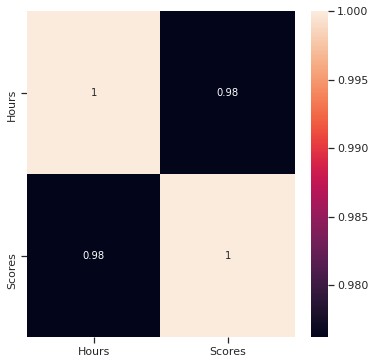

In [80]:
plt.figure(figsize = (6,6))
corr = df.corr()
sns.heatmap(corr, annot = True)

The result of the correlation map is that both the columns hours and the scores are highly positively correlated

**Data** **Visualization**

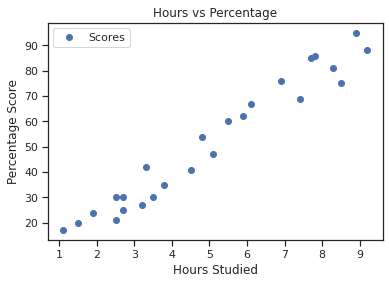

In [81]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Splitting the Data**

In [82]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [83]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Training the Data**

In [84]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

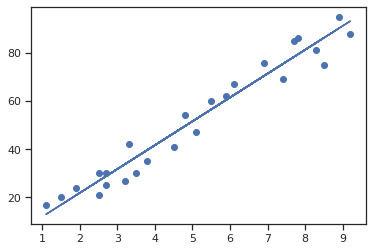

In [85]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Predicting Hours**

In [86]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [87]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


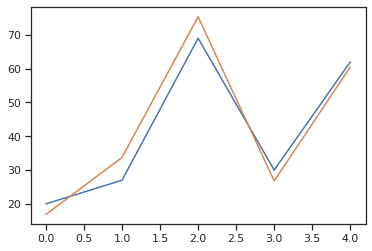

In [88]:
plt.plot(df1)

In [89]:
# You can also test with your own data
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred= regressor.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 96.16939660753593


**Error**

In [90]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
